<a href="https://colab.research.google.com/github/Juanisazalu/Analitica2_trabajo2/blob/main/Interpretaci%C3%B3n_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib.pyplot import figure
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from kneed import KneeLocator
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA, FactorAnalysis
from scipy import stats
import plotly.express as px

In [5]:
df=pd.read_csv("tablacompleta.csv")

las variables que mas carga tienen en la componente uno son:
frecuencia compras
frecuencia compras a plazo
frecuencia avances en efectivo
Porcentaje total  pagado por el titular

en la componente dos son:
frecuencua actualizacion saldo
Saldo disponible
Limite de la tarjeta de credito
frecuencia avances en efectivo
frecuencias compras de un solo pago
Porcentaje total  pagado por el titular

en la componente tres:
Antieguedad
frecuencia avances en efectivo
frecuencia compras a plazo
frecuencia compras con la tarjera




<Axes: xlabel='cluster_3', ylabel='count'>

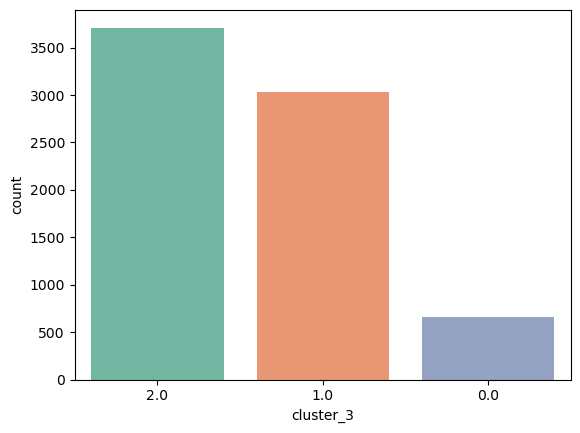

In [9]:
sns.countplot(x="cluster_3",data=df, palette="Set2", order = df['cluster_3'].value_counts().index)


Los cluster tienen observaciones diferentes, el cluster dos es el que mayor tiene observaciones, luego el uno y por ultimo el cluster cero.

In [10]:
df.groupby(["cluster_3"]).mean()

,saldo,frecuenciaactsaldo,comprastotales,montomaxcomprado,montoacuotas,anticipoefectivo,frecuenciacompras,freccomprasunavez,freccomprasplazo,frecpagoantefectivo,ntranscashinadv,ntransacciones,limtarjetacredito,pagos,montominpagos,%totalpagado,antiguedad
cluster_3,,,,,,,,,,,,,,,,,
0.0,812.412994,0.780677,362.481763,199.297325,163.640365,1059.872535,0.420274,0.107561,0.291257,0.191235,3.139818,5.183891,2351.516387,571.743336,348.348157,0.171458,7.404255
1.0,918.028762,0.933743,1121.533419,564.019310,557.710310,251.794257,0.861912,0.309196,0.682385,0.046449,0.906601,20.971947,4423.476431,1255.861555,448.827536,0.269429,11.882508
2.0,1548.508540,0.854743,245.257370,188.439569,57.101873,953.249491,0.158117,0.082722,0.073503,0.158657,3.222582,2.825653,3828.021198,1076.785033,588.057524,0.053901,11.873080


In [38]:
pal=['autumn','cool','magma','spring','winter'] # 5 color palettes for 5 categorical vars

C:\Users\Luisa\AppData\Local\Temp\ipykernel_12128\2959665804.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=temp_edad[temp_edad.cluster_3==i],x='frecuenciacompras',hue='cluster_3',palette=pal[i],binwidth=.8,ax=axs[i],multiple='dodge')
C:\Users\Luisa\AppData\Local\Temp\ipykernel_12128\2959665804.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=temp_edad[temp_edad.cluster_3==i],x='frecuenciacompras',hue='cluster_3',palette=pal[i],binwidth=.8,ax=axs[i],multiple='dodge')
C:\Users\Luisa\AppData\Local\Temp\ipykernel_12128\2959665804.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=temp_edad[temp_edad.cluster_3==i],x='frecuenciacompras',hue='cluster_3',palette=pal[i],binwidth=.8,ax=axs[i],multiple='dodge')


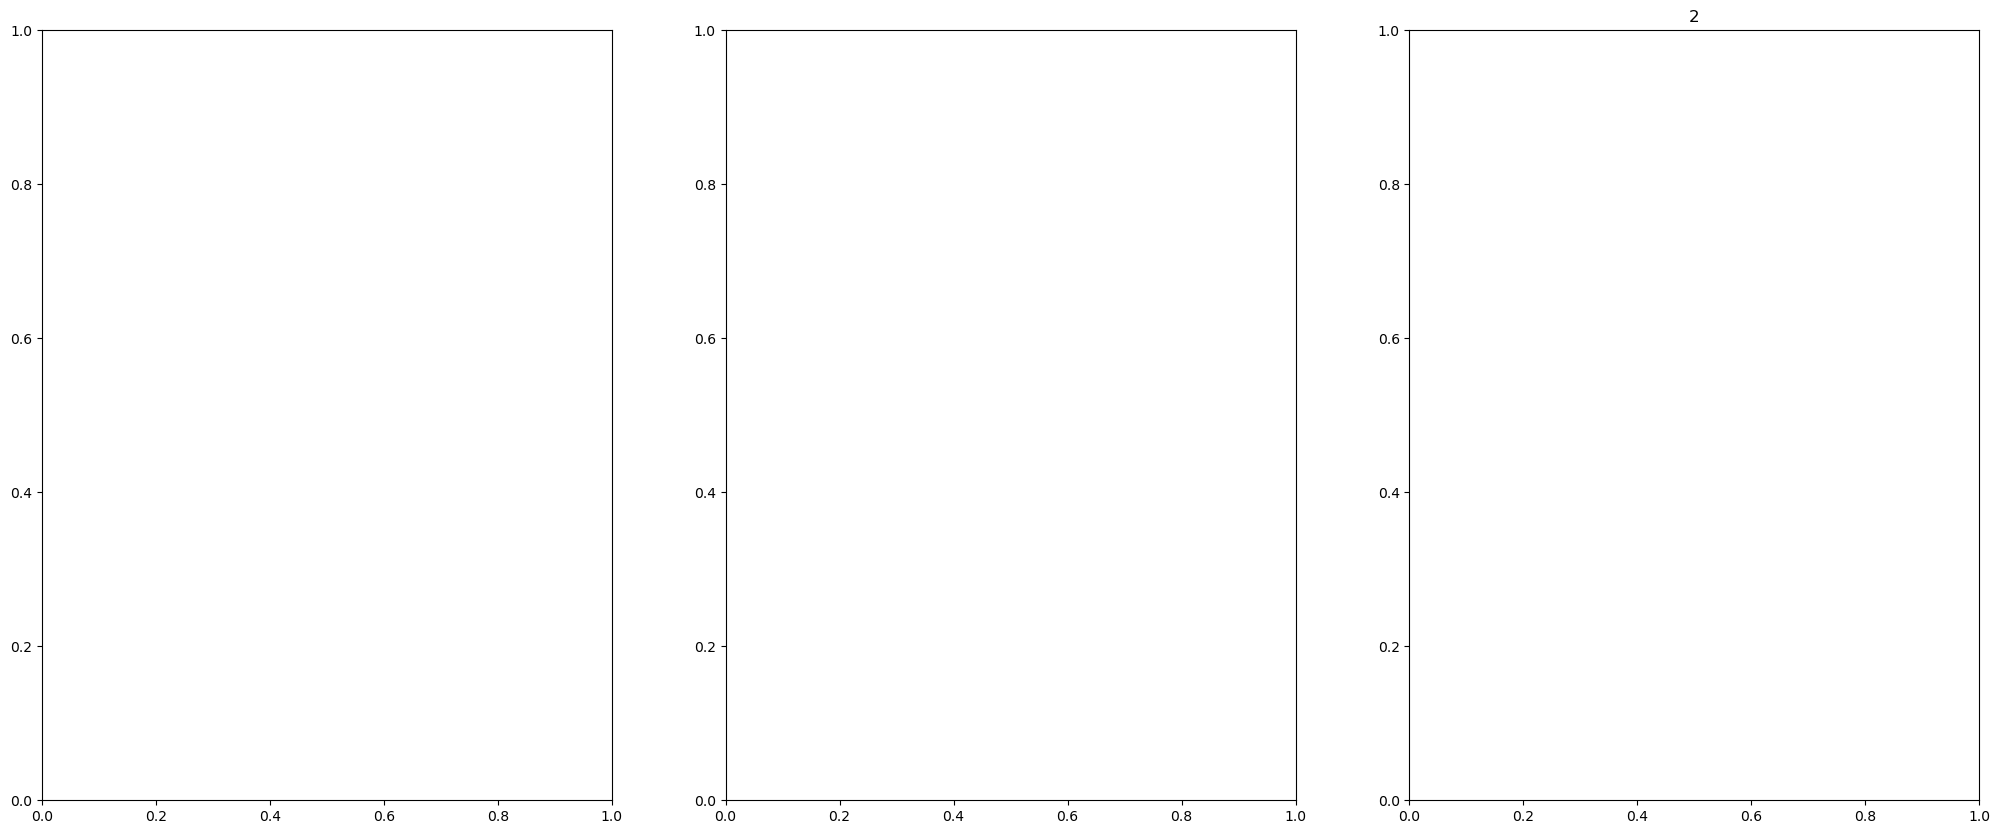

In [42]:
# Análisis de la edad
temp_edad = df[['cluster_3','frecuenciacompras']]
fig,axs=plt.subplots(ncols=3,figsize =(25, 10))

for i in list(range(0,3)):
    plt.title(i)
    sns.histplot(data=temp_edad[temp_edad.cluster_3==i],x='frecuenciacompras',hue='cluster_3',palette=pal[i],binwidth=.8,ax=axs[i],multiple='dodge')


In [33]:
# Luego, puedes usar Seaborn para crear un boxplot:
plt.figure(figsize=(12, 8))  # Ajusta el tamaño del gráfico

# Especifica los datos y las variables para el boxplot
sns.boxplot(x='cluster_3', data=df, orient='v')  # "categoria" es la variable categórica

# Personaliza el gráfico si es necesario
plt.title('Boxplot de 15 variables por categoría')
plt.xlabel('Categoría')
plt.ylabel('Valor')
plt.xticks(rotation=45)  # Rota las etiquetas del eje x para mayor legibilidad

# Muestra el gráfico
plt.show

c:\Users\Luisa\anaconda3\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


TypeError: Horizontal orientation requires numeric `x` variable.

<Figure size 1200x800 with 0 Axes>

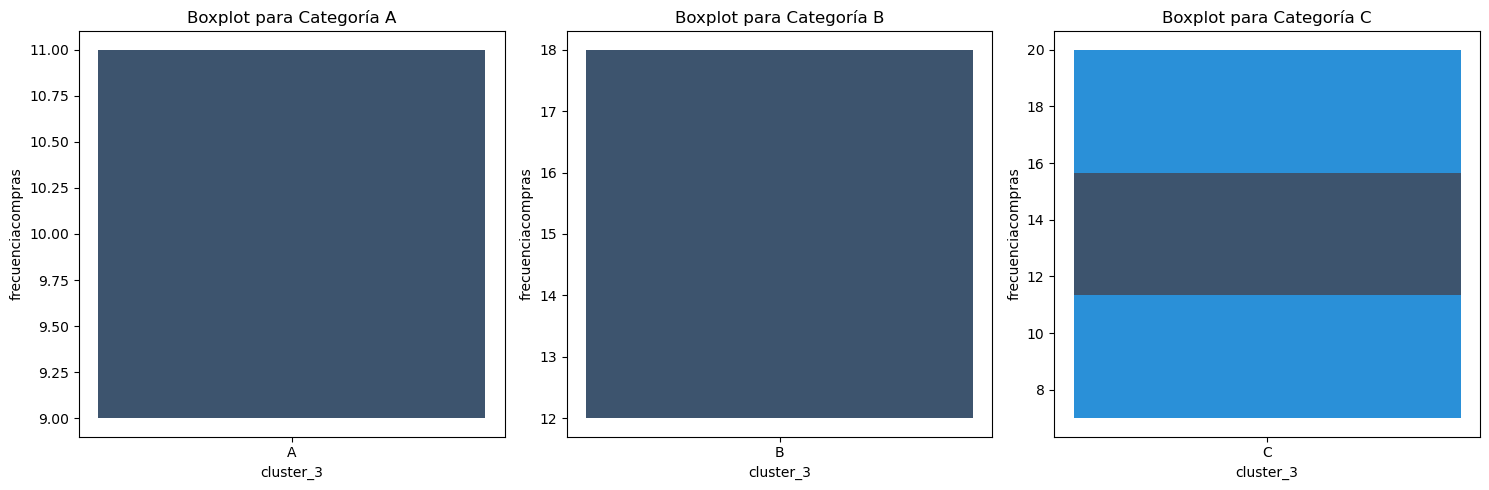

In [46]:
# Crear un boxplot para cada categoría en subgráficos separados
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))

for i, categoria in enumerate(df["cluster_3"].unique()):
    sns.histplot(data=df[df["cluster_3"] == categoria], x="cluster_3", y="frecuenciacompras", ax=axs[i])
    axs[i].set_title(f'Boxplot para Categoría {categoria}')

# Ajustar el diseño de los subgráficos
plt.tight_layout()

# Mostrar los subgráficos
plt.show()






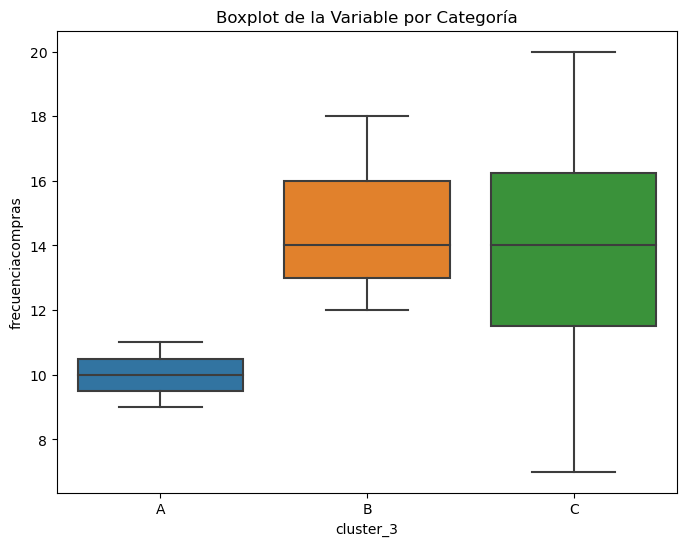

In [37]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="cluster_3", y="frecuenciacompras", data=df)

# Agregar título y etiquetas
plt.title("Boxplot de la Variable por Categoría")
plt.xlabel("cluster_3")
plt.ylabel("frecuenciacompras")

# Mostrar el boxplot
plt.show()

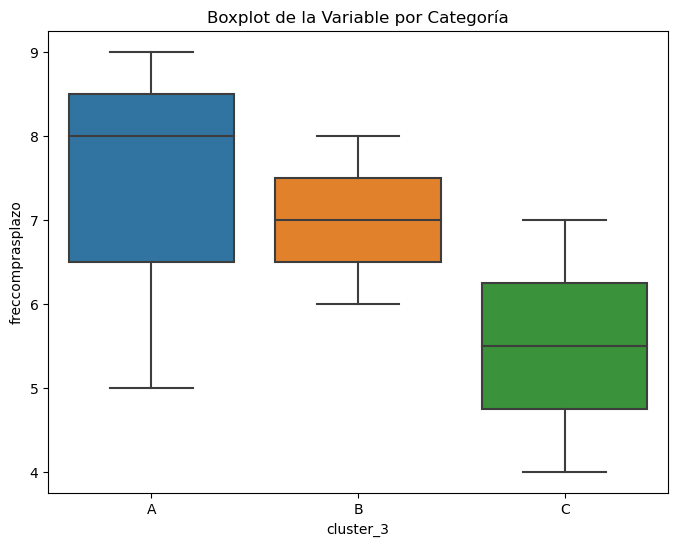

In [36]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="cluster_3", y="freccomprasplazo", data=df)

# Agregar título y etiquetas
plt.title("Boxplot de la Variable por Categoría")
plt.xlabel("cluster_3")
plt.ylabel("freccomprasplazo")

# Mostrar el boxplot
plt.show()

In [ ]:
# Analisis de la encuesta
temp_encuesta = df_final.columns[6:20]
df_final["Average_point"]=round(df_final[temp_encuesta].mean(axis=1),3)

fig,axs=plt.subplots(ncols=4,figsize =(25, 10),sharex=True)

for i in list(range(0,4)):
    plt.title(i)
    sns.histplot(data=df_final[df_final.Cluster_1==i],x="Average_point",hue="Cluster_1",palette=pal[i],binwidth=.5,ax=a

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

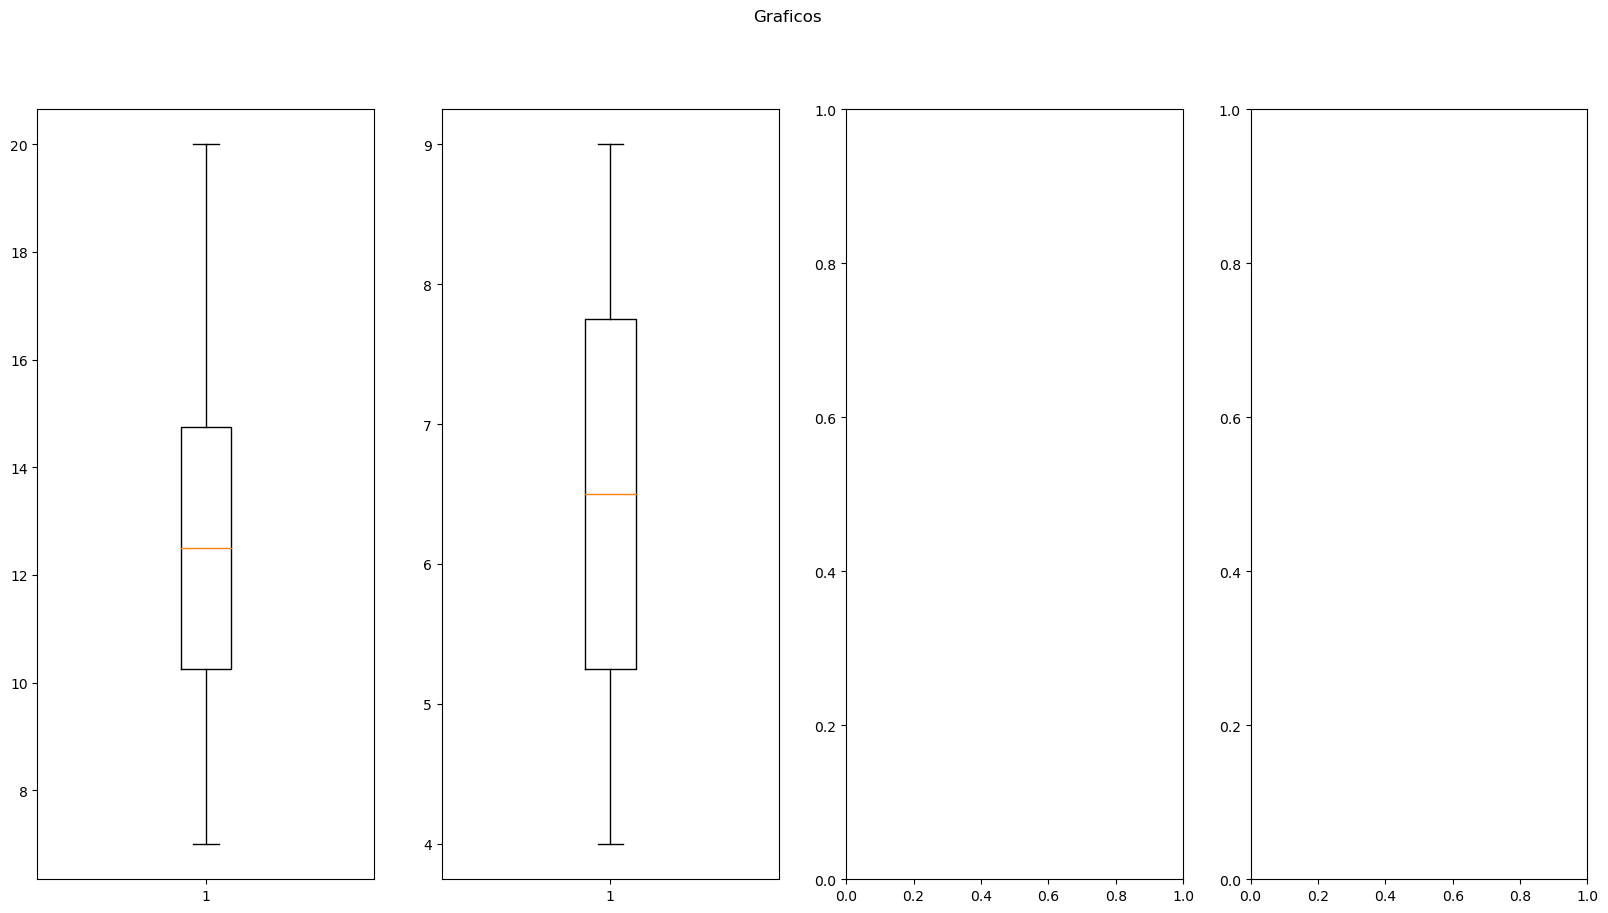

In [27]:
fig, ax= plt.subplots(figsize=(20,10), nrows=1, ncols=4)
fig.suptitle("Graficos")
contador_ax=0
for feature_name, feature_array in df.items():
    ax=fig.axes[contador_ax]
    ax.boxplot(feature_array)
    contador_ax+=1
    
"""ax[0].hist(tabla["montominpagos"])
ax[1].boxplot(tabla["montominpagos"]) 
ax[2].hist(tabla["limtarjetacredito"]) 
ax[3].boxplot(tabla["limtarjetacredito"]) """

<Axes: xlabel='cluster_3', ylabel='freccomprasplazo'>

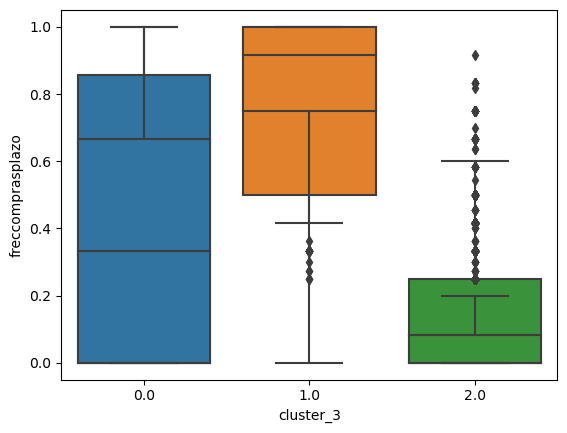

In [21]:

sns.boxplot(y = df["frecuenciacompras"], x = df["cluster_3"])
sns.boxplot(y = df["freccomprasplazo"], x = df["cluster_3"])

Medias de las varibles por ca cluster

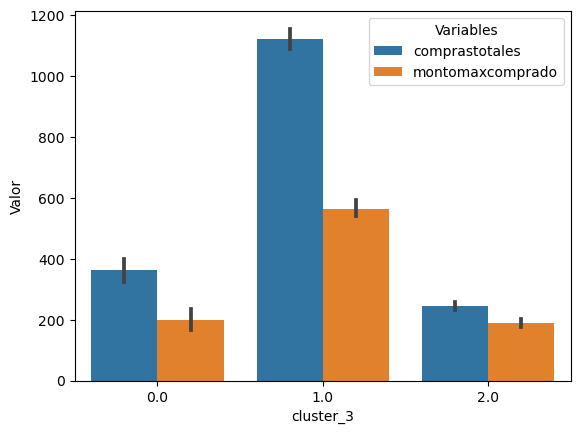

In [12]:

df1=df.loc[:,["comprastotales","montomaxcomprado","cluster_3"]]

# Usar melt para reorganizar el DataFrame
df_melted = df1.melt(id_vars='cluster_3', var_name='Variable', value_name='Valor')

# Crear un gráfico de barras con Seaborn
sns.barplot(x='cluster_3', y='Valor', hue='Variable', data=df_melted)

# Mostrar la leyenda
plt.legend(title='Variables')

# Mostrar el gráfico
plt.show()